In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.integrate import quad
from scipy.optimize import curve_fit
from scipy.misc import derivative
from sympy import *
from galaxy2 import Galaxy

def read_dat(filename):
    head = []
    with open(filename, 'r') as f:
        for i in range(3):
            head.append(next(f).strip()[2:].split('\t'))

    frame = pd.read_csv(filename, sep='\t', comment='#', names=head[1])

    distance = float(head[0][0].split()[2])
    distance_units = head[0][0].split()[3]

    units = head[2]

    data = {
        'frame': frame,
        'feature_names': head[1],
        'feature_units': units,
        'distance': distance,
        'distance_units': distance_units
    }

    return data

example_data = read_dat("/home/elijah-k2/Masters/Code/Rotation-Curves-master/Rotmass/Rotmass/IC4202_rotmass.dat")
example_df = example_data["frame"]
print(example_df.head())  # Check if data is loaded correctly

try:
    IC = Galaxy(example_df)
    print("Galaxy object created successfully")
except Exception as e:
    print(f"Error creating Galaxy object: {e}")

rad = IC.rad
print("Radius values:", rad)

# Uncomment the following lines once you confirm the above steps work correctly
# v_inter = IC.v_inter
# vobs = IC.vobs

# rc = sns.lineplot(x=rad, y=v_inter, label="Model")
# sns.scatterplot(x=rad, y=vobs, label="Vobs data")
# rc.set_xlabel("Radius")
# rc.set_ylabel("Velocity")
# rc.legend()
# plt.show()


    Rad   Vobs  errV  Vgas  Vdisk    Vbul  SDgas  SDdisk    SDbul
0  0.77   35.1  3.96  2.10  21.21  133.76   3.58  342.70  2678.70
1  1.59   77.9  3.95  3.27  41.34  176.62   3.29  329.63   948.63
2  2.36  115.0  6.70  3.34  58.81  176.92   3.02  317.82   463.05
3  3.13  156.0  3.16 -1.71  75.35  172.53   2.78  306.42   349.20
4  3.95  192.0  3.14 -5.86  92.34  173.49   2.70  294.74   188.22
Buldge Fit Parameters: [3.19305194e+03 7.20867298e-01]
Gas Fit Parameters: [ 2.98069379e+00  7.49037095e-01 -2.63219322e-01  4.00904256e-02
  4.30332671e-07  4.02564457e+00]
Disk Fit Parameters: [284.92261596   8.7110039 ]
Velocity Fit Parameters: [15.]
Galaxy object created successfully
Radius values: [ 0.77  1.59  2.36  3.13  3.95  4.73  5.5   6.27  7.08  7.86  8.66  9.45
 10.24 11.02 11.79 12.47 13.34 14.11 14.59 14.98 15.75 16.52 17.1  17.88
 18.65 19.62 20.78 22.13 23.   23.58 25.03 25.9 ]


In [9]:
import numpy as np
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.optimize import curve_fit
from scipy.misc import derivative
from astropy import units as u
from astropy import constants as c
from sympy import *

In [10]:
G = c.G.value
hbar = c.hbar.value
c = c.c.value

In [11]:

M_pl = ((hbar * c)/(8*np.pi*G))**0.5

In [12]:
M_pl

4.341358399139358e-09

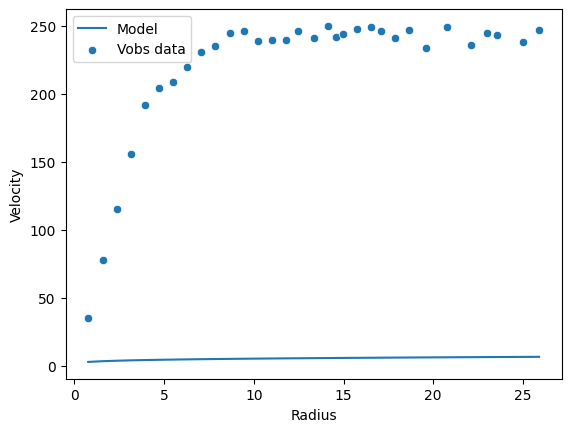

In [2]:
# Uncomment the following lines once you confirm the above steps work correctly
v_inter = IC.v_inter
vobs = IC.vobs

rc = sns.lineplot(x=rad, y=v_inter, label="Model")
sns.scatterplot(x=rad, y=vobs, label="Vobs data")
rc.set_xlabel("Radius")
rc.set_ylabel("Velocity")
rc.legend()
plt.show()